In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Fraud.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
#drop duplicates
df.drop_duplicates(inplace =True)

In [6]:
#apply value count in all col
for i in df.columns:
  print(df[i].value_counts())
  print('     ')

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
     
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
     
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
     
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
     
oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49 

In [7]:
df.drop(columns=['nameOrig','nameDest'],inplace =True)

In [8]:
df['isFraud'].value_counts()/df.shape[0] * 100

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

In [9]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


**EDA**

Text(0, 0.5, 'count')

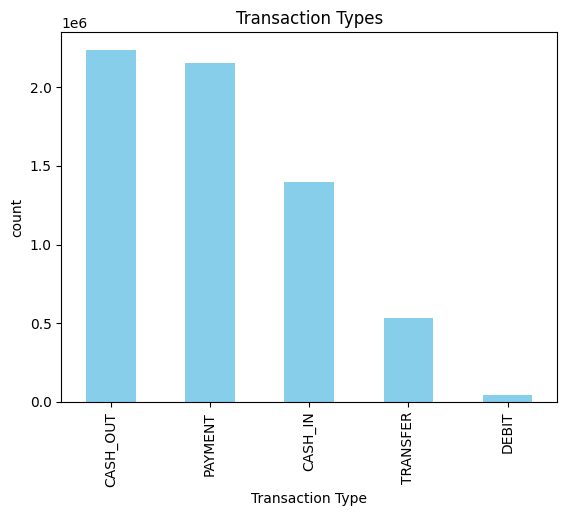

In [10]:
#Count frequency
df['type'].value_counts().plot(kind='bar',title='Transaction Types', color= 'skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('count')

**Fraudulent Transaction Pattern Observations**

Fraud distributions among different types(Transfer, cash out etc)

Text(0.5, 0, 'type')

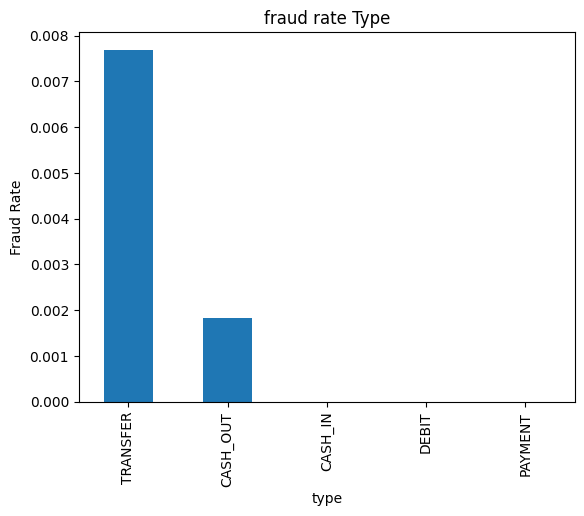

In [11]:
#Fraud distribution
fraud_rate_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_rate_type.plot(kind='bar',title='fraud rate Type')
plt.ylabel('Fraud Rate')
plt.xlabel("type")

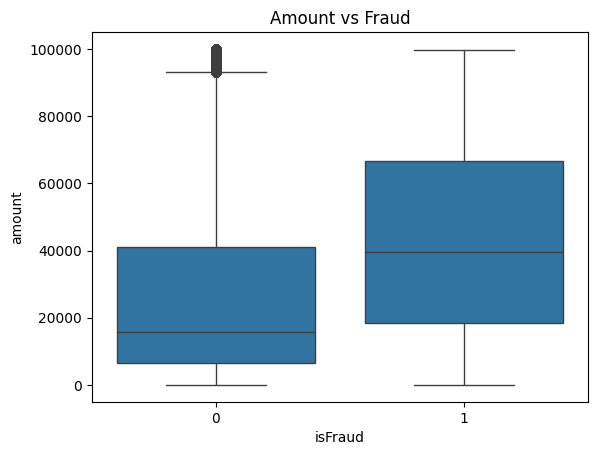

In [12]:
#amount vs Fraud
sns.boxplot(data = df[df['amount'] < 100000],x=df['isFraud'],y='amount')
plt.title('Amount vs Fraud')
plt.show()

In [13]:
#Amount analysis

fraud = df[df['isFraud'] ==1]
non_fraud = df[df['isFraud']==0]

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


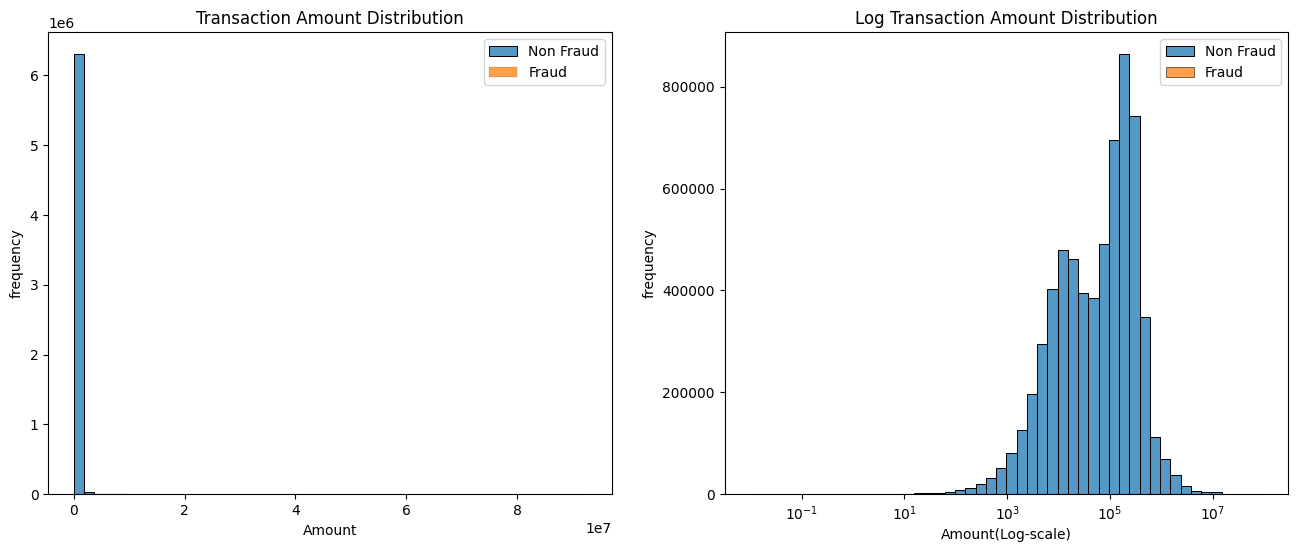

In [14]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

# Regular histogram
sns.histplot(non_fraud['amount'], bins = 50,label='Non Fraud',ax = axes[0],kde=False)
sns.histplot(fraud['amount'], bins=50,label='Fraud',ax=axes[0],kde=False)
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('frequency')
axes[0].legend()

#log-scaled histogram
sns.histplot(non_fraud['amount'], bins = 50,label='Non Fraud',ax = axes[1],kde=False, log_scale=(True,False))
sns.histplot(fraud['amount'], bins=50,label='Fraud',ax=axes[1],kde=False, log_scale=(True,False))
axes[1].set_title('Log Transaction Amount Distribution')
axes[1].set_xlabel('Amount(Log-scale)')
axes[1].set_ylabel('frequency')
axes[1].legend()

After analyzing isFraud == 1 cases in the dataset, two strong patterns emerged:

In most fraudulent transactions, the newbalanceOrig is 0, suggesting the entire balance was transferred out. or
The amount field frequently takes round values, often powers of 10, indicating premeditated or scripted transaction behavior.
These patterns hint at suspicious activities typically used in money laundering or account takeovers.

So out of all 8213 fraud transactions, 8053 or 98% happened when the newbalanceOrig == 0, meaning the sender’s account got completely drained.

In [15]:
#extract day and hours 
df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24

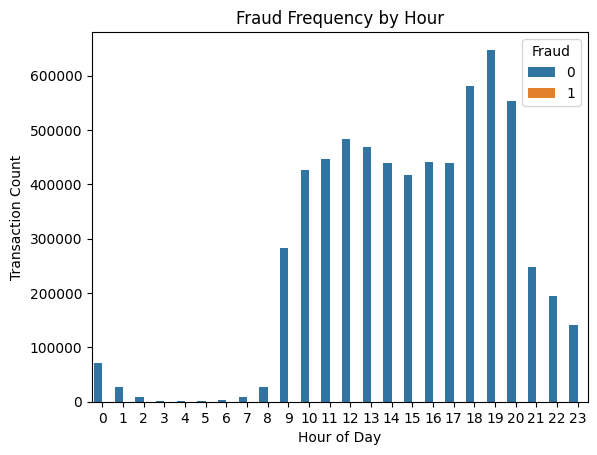

In [16]:
sns.countplot(x='hour', hue='isFraud', data=df)
plt.title('Fraud Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud')
plt.show()


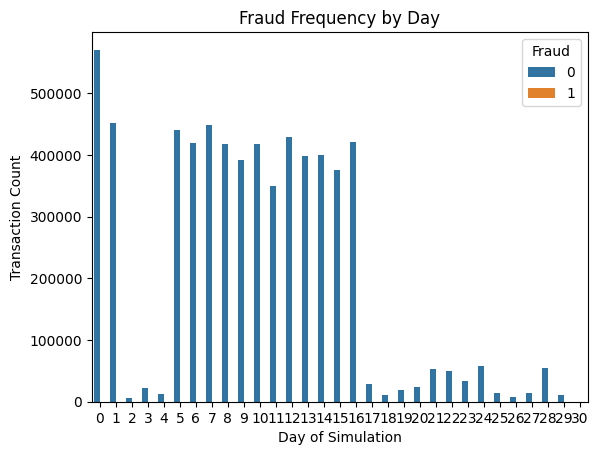

In [17]:
sns.countplot(x='day', hue='isFraud', data=df)
plt.title('Fraud Frequency by Day')
plt.xlabel('Day of Simulation')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud')
plt.show()


**What You’ll Likely Discover**
Fraud spikes during early hours (e.g., 2–5 AM).

Weekends (days 5, 6, 12, 13, etc.) may show elevated fraud rates.

Certain days might show coordinated attacks—useful for alert systems.

In [18]:
#df2[(df2['type'] == 'TRANSFER') | (df2['type'] == 'CASH_OUT')]
fraud_df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_df['isFraud'].value_counts()

isFraud
0    2762196
1       8213
Name: count, dtype: int64

In [19]:
fraud_df[fraud_df['isFraud'] == 1].sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
1059628,110,TRANSFER,904124.58,904124.58,0.0,0.00,0.00,1,0,14,4
6357491,710,CASH_OUT,33613.11,33613.11,0.0,0.00,33613.11,1,0,14,29
1059575,105,CASH_OUT,188854.39,188854.39,0.0,0.00,188854.39,1,0,9,4
6223226,590,TRANSFER,2117503.53,2117503.53,0.0,0.00,0.00,1,0,14,24
5552699,383,CASH_OUT,113921.02,113921.02,0.0,0.00,113921.02,1,0,23,15
6032857,475,CASH_OUT,11424.36,11424.36,0.0,155495.90,166920.26,1,0,19,19
6193322,571,TRANSFER,406864.17,406864.17,0.0,0.00,0.00,1,0,19,23
2852554,227,TRANSFER,4075956.58,4075956.58,0.0,0.00,0.00,1,0,11,9
1932194,172,CASH_OUT,976830.22,976830.22,0.0,0.00,976830.22,1,0,4,7
2382163,198,CASH_OUT,7620549.14,7620549.14,0.0,128355.13,7748904.27,1,0,6,8


**Fraudulent Transaction Pattern Observations**

After analyzing isFraud == 1 cases in the dataset, two strong patterns emerged:

In most fraudulent transactions, the newbalanceOrig is 0, suggesting the entire balance was transferred out. or
The amount field frequently takes round values, often powers of 10, indicating premeditated or scripted transaction behavior.
These patterns hint at suspicious activities typically used in money laundering or account takeovers.

So out of all 8213 fraud transactions, 8053 or 98% happened when the newbalanceOrig == 0, meaning the sender’s account got completely drained.

In [41]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag,isDrained,isRoundAmount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.021873,-0.010046,-0.010285,0.027681,0.025697,0.031580,0.003278,0.061724,0.999539,-0.009119,-0.008638,0.005348,0.012111,-0.012882,0.002873,0.004960,0.006768
amount,0.021873,1.000000,-0.002386,-0.007515,0.298771,0.458102,0.077820,0.012470,-0.030323,0.022826,0.040901,0.041038,0.115830,0.325817,-0.003289,-0.023581,-0.199104,0.366057
oldbalanceOrg,-0.010046,-0.002386,1.000000,0.998803,0.066235,0.042231,0.010154,0.003835,-0.001011,-0.010029,-0.202846,-0.201849,-0.323713,0.013953,-0.200923,-0.021452,-0.189509,-0.081553
newbalanceOrig,-0.010285,-0.007515,0.998803,1.000000,0.067803,0.042053,-0.008149,0.003776,-0.000854,-0.010274,-0.205196,-0.204456,-0.334847,0.006095,-0.211004,-0.021874,-0.193940,-0.087309
oldbalanceDest,0.027681,0.298771,0.066235,0.067803,1.000000,0.978380,-0.005886,-0.000514,-0.001559,0.027768,0.074939,0.074037,0.041411,0.037406,0.086009,0.009344,-0.231484,0.130643
newbalanceDest,0.025697,0.458102,0.042231,0.042053,0.978380,1.000000,0.000554,-0.000529,-0.006786,0.025940,0.089538,0.089076,0.079473,0.134602,0.093990,0.006397,-0.238369,0.190509
isFraud,0.031580,0.077820,0.010154,-0.008149,-0.005886,0.000554,1.000000,0.044109,-0.031402,0.032579,-0.025026,-0.024607,0.029988,0.059595,0.011254,-0.002911,-0.025700,0.053908
isFlaggedFraud,0.003278,0.012470,0.003835,0.003776,-0.000514,-0.000529,0.044109,1.000000,-0.000462,0.003296,-0.001114,0.002268,-0.001816,0.014249,-0.001168,-0.000128,-0.001134,0.005248
hour,0.061724,-0.030323,-0.001011,-0.000854,-0.001559,-0.006786,-0.031402,-0.000462,1.000000,0.031404,-0.001469,-0.001250,-0.015523,0.001663,0.002083,-0.009796,0.011121,-0.008232
day,0.999539,0.022826,-0.010029,-0.010274,0.027768,0.025940,0.032579,0.003296,0.031404,1.000000,-0.009087,-0.008612,0.005828,0.012078,-0.012964,0.003174,0.004629,0.007028


**Outlier**

In [20]:
df[(df['oldbalanceOrg'] == 0) & (df['amount'] > 0)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
29,1,PAYMENT,9920.52,0.0,0.0,0.00,0.00,0,0,1,0
30,1,PAYMENT,3448.92,0.0,0.0,0.00,0.00,0,0,1,0
31,1,PAYMENT,4206.84,0.0,0.0,0.00,0.00,0,0,1,0
32,1,PAYMENT,5885.56,0.0,0.0,0.00,0.00,0,0,1,0
33,1,PAYMENT,5307.88,0.0,0.0,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6355984,709,PAYMENT,3837.05,0.0,0.0,0.00,0.00,0,0,13,29
6356000,709,CASH_OUT,104570.26,0.0,0.0,2890040.30,2994610.55,0,0,13,29
6356051,709,CASH_OUT,244966.80,0.0,0.0,5254563.09,5499529.89,0,0,13,29
6356052,709,CASH_OUT,123403.11,0.0,0.0,606875.62,730278.74,0,0,13,29


In [21]:
df[(df['newbalanceOrig'] == df['oldbalanceOrg'])]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
29,1,PAYMENT,9920.52,0.00,0.00,0.00,0.00,0,0,1,0
30,1,PAYMENT,3448.92,0.00,0.00,0.00,0.00,0,0,1,0
31,1,PAYMENT,4206.84,0.00,0.00,0.00,0.00,0,0,1,0
32,1,PAYMENT,5885.56,0.00,0.00,0.00,0.00,0,0,1,0
33,1,PAYMENT,5307.88,0.00,0.00,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362461,730,CASH_OUT,0.00,0.00,0.00,1008609.53,1008609.53,1,0,10,30
6362462,730,TRANSFER,7316255.05,17316255.05,17316255.05,0.00,0.00,1,1,10,30
6362463,730,CASH_OUT,0.00,0.00,0.00,0.00,0.00,1,0,10,30
6362584,741,TRANSFER,5674547.89,5674547.89,5674547.89,0.00,0.00,1,1,21,30


In [22]:
df[(df['oldbalanceDest'] == 0) & (df['newbalanceDest'] > 1e7)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
24433,8,TRANSFER,161270.71,1302.0,0.00,0.0,10408504.67,0,0,8,0
48037,9,CASH_OUT,89359.95,31895.0,0.00,0.0,13638102.78,0,0,9,0
56757,9,TRANSFER,1611762.94,7431.0,0.00,0.0,28309318.32,0,0,9,0
72501,9,CASH_IN,191988.38,913.0,192901.38,0.0,14615125.42,0,0,9,0
76591,10,CASH_OUT,123636.58,204494.0,80857.42,0.0,14615125.42,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...
6284314,659,TRANSFER,10000000.00,41823.0,0.00,0.0,12968564.30,0,0,11,27
6285553,659,TRANSFER,10000000.00,9934.0,0.00,0.0,13655564.65,0,0,11,27
6304474,684,TRANSFER,10000000.00,33061.0,0.00,0.0,10345203.74,0,0,12,28
6304774,684,TRANSFER,10000000.00,13422.0,0.00,0.0,11282669.98,0,0,12,28


In [23]:
# basic stats
n = len(df)
conds = {
 "org_zero_amount": (df['oldbalanceOrg'] == 0) & (df['amount'] > 0),
 "no_balance_change": df['newbalanceOrig'] == df['oldbalanceOrg'],
 "dest_big_jump": (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] > 1e7),
}

for name, cond in conds.items():
    subset = df[cond]
    print(name)
    print(" count:", len(subset), f"({100*len(subset)/n:.4f}%)")
    if len(subset) > 0:
        print(" isFraud rate:", subset['isFraud'].mean())
        print(" types distribution:\n", subset['type'].value_counts(normalize=True).head())
    print("-"*40)


org_zero_amount
 count: 2102433 (33.0435%)
 isFraud rate: 1.1890985348879131e-05
 types distribution:
 type
CASH_OUT    0.487903
PAYMENT     0.368261
TRANSFER    0.134503
CASH_IN     0.006404
DEBIT       0.002929
Name: proportion, dtype: float64
----------------------------------------
no_balance_change
 count: 2089037 (32.8330%)
 isFraud rate: 2.7285299398718166e-05
 types distribution:
 type
CASH_OUT    0.491040
PAYMENT     0.370623
TRANSFER    0.135373
DEBIT       0.002948
CASH_IN     0.000016
Name: proportion, dtype: float64
----------------------------------------
dest_big_jump
 count: 603 (0.0095%)
 isFraud rate: 0.0
 types distribution:
 type
TRANSFER    0.985075
CASH_OUT    0.009950
CASH_IN     0.004975
Name: proportion, dtype: float64
----------------------------------------


In [24]:
#remove  big jump row
mask = (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] > 1e7)
df = df[~mask].copy()


In [25]:
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


**Feature Engineering**

In [26]:
df['account_emptied_flag'] = ((df['oldbalanceOrg'] == 0) & (df['amount'] > 0)).astype(int)
df['no_balance_change_flag'] = (df['newbalanceOrig'] == df['oldbalanceOrg']).astype(int)

In [27]:
df.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag
4426968,322,PAYMENT,12843.77,72597.00,59753.23,0.0,0.0,0,0,10,13,0,0
3167179,238,PAYMENT,7667.89,258.00,0.00,0.0,0.0,0,0,22,9,0,0
4537996,326,PAYMENT,22078.53,0.00,0.00,0.0,0.0,0,0,14,13,1,1
4449957,323,PAYMENT,9389.54,97770.67,88381.14,0.0,0.0,0,0,11,13,0,0
402318,18,PAYMENT,10110.26,0.00,0.00,0.0,0.0,0,0,18,0,1,1


In [28]:
df['isDrained'] = (df['newbalanceOrig'] == 0).astype(int)

In [29]:
df['isRoundAmount'] = df['amount'].apply(lambda x: int(np.log10(x)) == np.log10(x) if x > 0 else 0).astype(int)

In [30]:
df[df['isRoundAmount'] == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag,isDrained,isRoundAmount
4440,4,TRANSFER,10000000.0,12930418.44,2930418.44,0.00,0.00,1,0,4,0,0,0,0,1
4441,4,CASH_OUT,10000000.0,10000000.00,0.00,0.00,9941904.21,1,0,4,0,0,0,1,1
18959,8,PAYMENT,1000.0,461.00,0.00,0.00,0.00,0,0,8,0,0,0,1,1
357597,17,PAYMENT,0.1,0.00,0.00,0.00,0.00,0,0,17,0,1,1,1,1
481250,19,TRANSFER,10000000.0,11861008.32,1861008.32,0.00,0.00,1,0,19,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362579,741,CASH_OUT,10000000.0,10000000.00,0.00,35922.97,10035922.97,1,0,21,30,0,0,1,1
6362580,741,TRANSFER,10000000.0,25674547.89,15674547.89,0.00,0.00,1,0,21,30,0,0,0,1
6362581,741,CASH_OUT,10000000.0,10000000.00,0.00,0.00,10000000.00,1,0,21,30,0,0,1,1
6362582,741,TRANSFER,10000000.0,15674547.89,5674547.89,0.00,0.00,1,0,21,30,0,0,0,1


In [37]:
df.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag,isDrained,isRoundAmount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0


In [35]:

df=pd.get_dummies(df, columns=['type'], drop_first=True, dtype=int)

In [38]:
df.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag,isDrained,isRoundAmount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0


In [39]:
df.shape

(6362017, 18)

In [42]:
df.drop(columns=['step'],inplace=True)

In [47]:
!pip install xgboost
!pip install -U scikit-learn
!pip install -U imbalanced-learn

   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/240.0 kB 131.3 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/240.0 kB 146.3 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/240.0 kB 179.6 kB/s eta 0:00:02
   ---------------- --------------------- 102.4/240.0 kB 393.8 kB/s eta 0:00:01
   ----------------------------- -------- 184.3/240.0 kB 588.1 kB/s eta 0:00:01
   -------------------------------------- 240.0/240.0 kB 736.3 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully unin

***Model training***

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, precision_recall_curve
)
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
# from lightgbm import LGBMClassifier   # alternative

# Imbalance tools
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline


In [51]:
#scaling
scaler = StandardScaler()
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = scaler.fit_transform(
    df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
)


In [52]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,account_emptied_flag,no_balance_change_flag,isDrained,isRoundAmount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.283937,-0.229825,-0.237639,-0.323831,-0.333463,0,0,1,0,0,0,0,0,0,0,1,0
1,-0.297329,-0.281372,-0.285828,-0.323831,-0.333463,0,0,1,0,0,0,0,0,0,0,1,0
2,-0.300156,-0.288666,-0.292457,-0.323831,-0.333463,1,0,1,0,0,0,1,0,0,0,0,1
3,-0.300156,-0.288666,-0.292457,-0.317600,-0.333463,1,0,1,0,0,0,1,0,1,0,0,0
4,-0.280867,-0.274342,-0.282236,-0.323831,-0.333463,0,0,1,0,0,0,0,0,0,0,1,0


In [53]:
RND = 42

In [56]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RND
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train fraud ratio:", y_train.mean(), " Test fraud ratio:", y_test.mean())

Train shape: (4453411, 16) Test shape: (1908606, 16)
Train fraud ratio: 0.0012909205999625905  Test fraud ratio: 0.0012909945792898062


In [ ]:
# scale_pos_weight = (neg / pos) in the training set
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

In [73]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=RND,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

C:\Users\sahua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [74]:
print("=== XGBoost with scale_pos_weight ===")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print("Average Precision (PR AUC):", average_precision_score(y_test, y_proba_xgb))

=== XGBoost with scale_pos_weight ===
              precision    recall  f1-score   support

           0     0.9999    0.9997    0.9998   1906142
           1     0.8011    0.9497    0.8691      2464

    accuracy                         0.9996   1908606
   macro avg     0.9005    0.9747    0.9344   1908606
weighted avg     0.9997    0.9996    0.9996   1908606

ROC AUC: 0.9995888965510835
Average Precision (PR AUC): 0.9718929171174059


In [80]:
# - For imbalanced problems, consider inspecting precision-recall curve and choosing
#   a threshold that gives acceptable recall while keeping precision reasonable.
# - Example: raise/lower threshold for predicting positive
probs = y_proba_xgb  # example using xgboost outputs
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# You can pick threshold that gives desired recall (e.g. recall >= 0.9)
desired_recall = 0.9
idx = np.argmax(recall >= desired_recall)
if idx < len(thresholds):
    chosen_threshold = thresholds[idx]
    print("Threshold for recall >= {:.2f} is {:.6f}".format(desired_recall, chosen_threshold))
else:
    print("Could not find threshold achieving that recall.")

Threshold for recall >= 0.80 is 0.000000


In [82]:
# -------------------------
# Helper: evaluation + plots
# -------------------------
def evaluate_and_plot(clf, X_test, y_test, name="model"):
    # produce preds, probs
    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(X_test)[:,1]
    elif hasattr(clf, "decision_function"):
        probs = clf.decision_function(X_test)
    else:
        # fallback
        probs = clf.predict(X_test)
    preds = (probs >= 0.5).astype(int)  # default threshold 0.5

    print(f"\n=== Eval: {name} (threshold=0.5) ===")
    print(classification_report(y_test, preds, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))
    try:
        print("ROC AUC:", roc_auc_score(y_test, probs))
    except:
        print("ROC AUC: n/a")
    try:
        print("Average precision (PR AUC):", average_precision_score(y_test, probs))
    except:
        print("Average precision: n/a")

    # PR + ROC plots
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(recall, precision)
    plt.title(f'Precision-Recall (AUC={pr_auc:.4f})')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(fpr, tpr)
    plt.title(f'ROC (AUC={roc_auc:.4f})')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probs

In [83]:
# 5) Threshold tuning (robust grid approach)
#    We'll compute metrics for many thresholds and pick:
#      - threshold that meets a target recall with highest precision
#      - threshold that maximizes F1
# -------------------------
def threshold_metrics_table(y_true, probs, grid=None):
    if grid is None:
        grid = np.linspace(0,1,101)
    rows = []
    for thr in grid:
        preds = (probs >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        prec = precision_score(y_true, preds, zero_division=0)
        rec = recall_score(y_true, preds, zero_division=0)
        f1 = f1_score(y_true, preds, zero_division=0)
        acc = accuracy_score(y_true, preds)
        rows.append((thr, tp, fp, fn, tn, prec, rec, f1, acc))
    cols = ['threshold','TP','FP','FN','TN','precision','recall','f1','accuracy']
    return pd.DataFrame(rows, columns=cols)

In [84]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

In [85]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("scale_pos_weight (neg/pos) =", scale_pos_weight)

scale_pos_weight (neg/pos) = 773.6409810401809


C:\Users\sahua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:43:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
exception calling callback for <Future at 0x2029eab4050 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\sahua\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\sahua\anaconda3\Lib\site-packages\joblib\parallel.py", line 833, in __call__
    self._dispatch_new()
  File "C:\Users\sahua\anaconda3\Lib\site-packages\joblib\parallel.py", line 847, in _dispatch_new
    self.parallel.dispatch_next()
  File "C:\Users\sahua\anaconda3\Lib\site-packages\joblib\parallel.py", line 1453, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users


=== Eval: XGBoost (scale_pos_weight) (threshold=0.5) ===
              precision    recall  f1-score   support

           0     0.9999    0.9997    0.9998   1906142
           1     0.8011    0.9497    0.8691      2464

    accuracy                         0.9996   1908606
   macro avg     0.9005    0.9747    0.9344   1908606
weighted avg     0.9997    0.9996    0.9996   1908606

Confusion matrix:
 [[1905561     581]
 [    124    2340]]
ROC AUC: 0.9995888965510835
Average precision (PR AUC): 0.9718929171174059


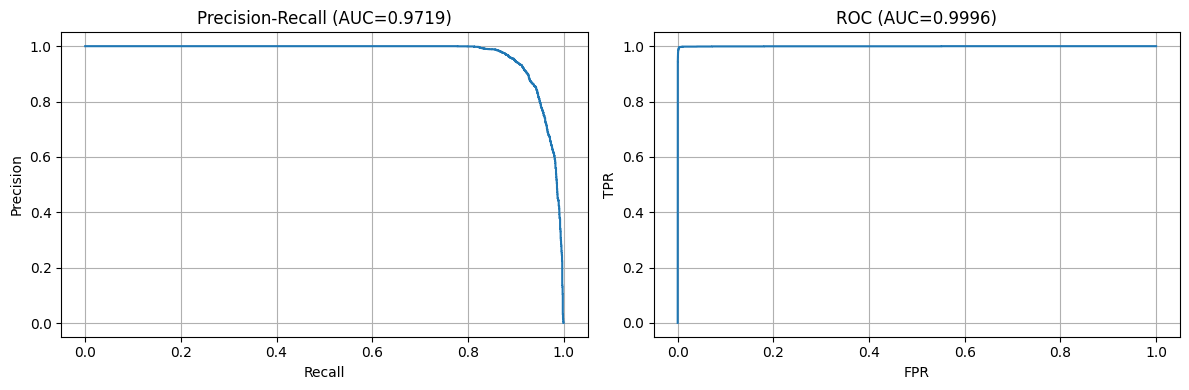

C:\Users\sahua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Eval: SMOTE + XGBoost (threshold=0.5) ===
              precision    recall  f1-score   support

           0     1.0000    0.9989    0.9995   1906142
           1     0.5448    0.9874    0.7022      2464

    accuracy                         0.9989   1908606
   macro avg     0.7724    0.9932    0.8508   1908606
weighted avg     0.9994    0.9989    0.9991   1908606

Confusion matrix:
 [[1904109    2033]
 [     31    2433]]
ROC AUC: 0.9995482697017558
Average precision (PR AUC): 0.9757419016565678


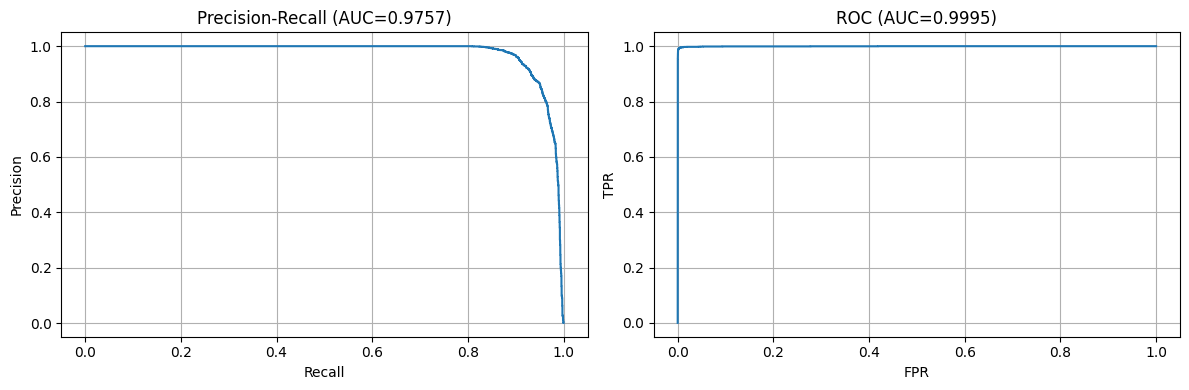

In [86]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=RND,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train)
probs_xgb = evaluate_and_plot(xgb_clf, X_test, y_test, name="XGBoost (scale_pos_weight)")

# 2) SMOTE + XGBoost (resample training only)
# -------------------------
smote = SMOTE(random_state=RND)
xgb_pipe = ImbPipeline([
    ("smote", smote),
    ("xgb", xgb.XGBClassifier(n_estimators=300, use_label_encoder=False,
                              eval_metric="logloss", random_state=RND, n_jobs=-1))
])
xgb_pipe.fit(X_train, y_train)
probs_xgb_smote = evaluate_and_plot(xgb_pipe, X_test, y_test, name="SMOTE + XGBoost")

In [87]:
# 3) Cross-validated recall comparison
# -------------------------
print("CV recall (XGB scale_pos_weight):",
      cross_val_score(xgb_clf, X_train, y_train, scoring="recall", cv=cv, n_jobs=-1).mean())

print("CV recall (SMOTE+XGB pipeline):",
      cross_val_score(xgb_pipe, X_train, y_train, scoring="recall", cv=cv, n_jobs=-1).mean())


CV recall (XGB scale_pos_weight): 0.939294660763613
CV recall (SMOTE+XGB pipeline): 0.9831274075755856


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\sahua\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:13:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB (scale_pos_weight) params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

=== Eval: Best XGB (scale_pos_weight) (threshold=0.5) ===
              precision    recall  f1-score   support

           0     1.0000    0.9930    0.9965   1906142
           1     0.1565    0.9984    0.2706      2464

    accuracy                         0.9931   1908606
   macro avg     0.5782    0.9957    0.6335   1908606
weighted avg     0.9989    0.9931    0.9956   1908606

Confusion matrix:
 [[1892883   13259]
 [      4    2460]]
ROC AUC: 0.9998098257169131
Average precision (PR AUC): 0.9540188586379525


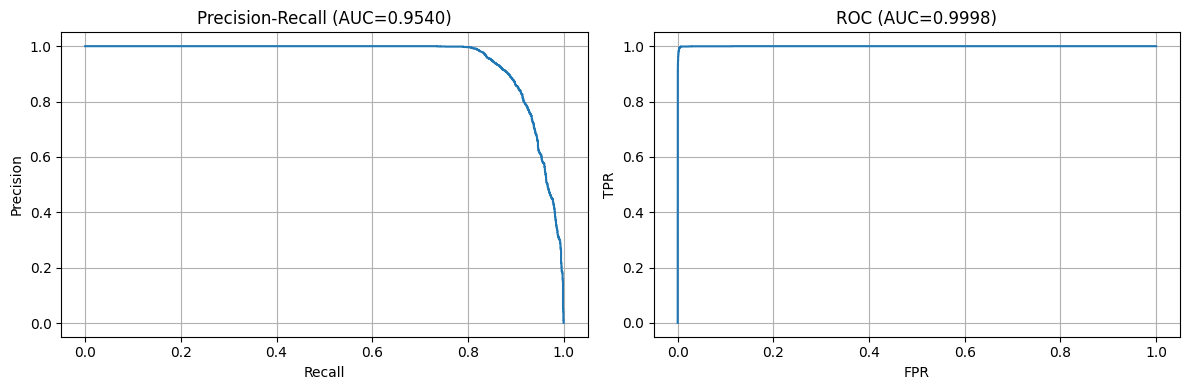

In [96]:
# 4) Hyperparameter tuning (RandomizedSearchCV)


# 4A) Param grid for XGB (scale_pos_weight)
xgb_param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    # keep scale_pos_weight as computed above
}

xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight,
                             random_state=RND, n_jobs=-1)

xgb_random = RandomizedSearchCV(
    xgb_base, param_distributions=xgb_param_dist, n_iter=5,
    scoring="recall", cv=3, random_state=RND, n_jobs=-1, verbose=1
)
xgb_random.fit(X_train, y_train)
print("Best XGB (scale_pos_weight) params:", xgb_random.best_params_)
best_xgb_spw = xgb_random.best_estimator_
probs_best_xgb_spw = evaluate_and_plot(best_xgb_spw, X_test, y_test, name="Best XGB (scale_pos_weight)")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\sahua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sahua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sahua\anaconda3\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sahua\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, r

Best SMOTE+XGB params: {'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'smote__k_neighbors': 7}

=== Eval: Best SMOTE+XGB (RandomizedSearch) (threshold=0.5) ===
              precision    recall  f1-score   support

           0     1.0000    0.9977    0.9988   1906142
           1     0.3594    0.9939    0.5279      2464

    accuracy                         0.9977   1908606
   macro avg     0.6797    0.9958    0.7634   1908606
weighted avg     0.9992    0.9977    0.9982   1908606

Confusion matrix:
 [[1901777    4365]
 [     15    2449]]
ROC AUC: 0.999728862113467
Average precision (PR AUC): 0.9762611806283156


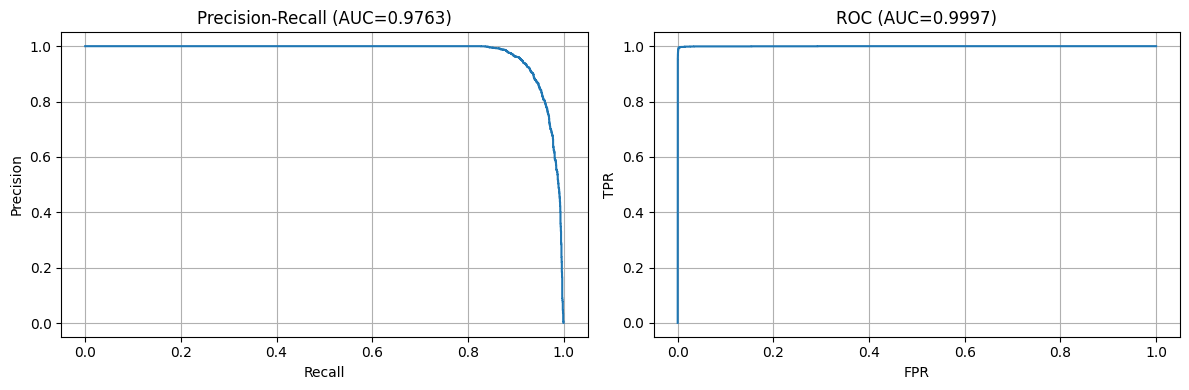

In [98]:
# 4B) Param grid for SMOTE + XGB
# Here we tune both smote (k_neighbors) and xgb params inside pipeline
xgb_pipe_param = {
    "smote__k_neighbors": [3, 5, 7],
    "xgb__n_estimators": [100, 200],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.05, 0.1]
}

xgb_pipe_base = ImbPipeline([
    ("smote", SMOTE(random_state=RND)),
    ("xgb", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=RND, n_jobs=-1))
])

xgb_pipe_search = RandomizedSearchCV(
    xgb_pipe_base, param_distributions=xgb_pipe_param, n_iter=5,
    scoring="f1", cv=3, random_state=RND, n_jobs=-1, verbose=1
)
xgb_pipe_search.fit(X_train, y_train)
print("Best SMOTE+XGB params:", xgb_pipe_search.best_params_)
best_xgb_smote = xgb_pipe_search.best_estimator_
probs_best_xgb_smote = evaluate_and_plot(best_xgb_smote, X_test, y_test, name="Best SMOTE+XGB (RandomizedSearch)")

In [99]:
# Choose which probs to analyze (use the best model you plan to deploy)
# Example: best_xgb_spw (scale_pos_weight tuned) vs best_xgb_smote
probs_for_threshold = probs_best_xgb_spw  # choose whichever is relevant

metrics_df = threshold_metrics_table(y_test, probs_for_threshold, grid=np.linspace(0,1,201))

# 1) threshold that meets target recall (0.90) and maximizes precision among those
target_recall = 0.90
candidates = metrics_df[metrics_df['recall'] >= target_recall]
if len(candidates) > 0:
    best_by_prec = candidates.sort_values(['precision','f1'], ascending=False).iloc[0]
    print("Best threshold with recall >= {:.2f}:".format(target_recall))
    print(best_by_prec.to_dict())
else:
    print("No threshold in grid achieves recall >= {:.2f}".format(target_recall))

Best threshold with recall >= 0.90:
{'threshold': 0.97, 'TP': 2218.0, 'FP': 364.0, 'FN': 246.0, 'TN': 1905778.0, 'precision': 0.8590240123934935, 'recall': 0.9001623376623377, 'f1': 0.8791121680539041, 'accuracy': 0.999680395010809}


Threshold maximizing F1: {'threshold': 0.99, 'TP': 2034.0, 'FP': 38.0, 'FN': 430.0, 'TN': 1906104.0, 'precision': 0.9816602316602316, 'recall': 0.825487012987013, 'f1': 0.8968253968253969, 'accuracy': 0.9997547948607518}


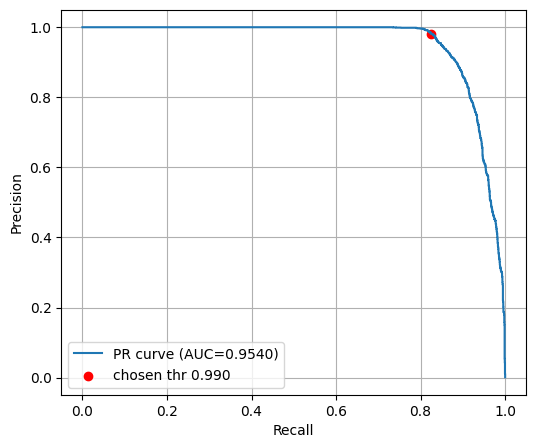

In [100]:
# 2) threshold that maximizes F1
best_f1_row = metrics_df.loc[metrics_df['f1'].idxmax()]
print("Threshold maximizing F1:", best_f1_row.to_dict())

# Optionally show the PR curve and mark chosen threshold point
precision, recall, pr_thresh = precision_recall_curve(y_test, probs_for_threshold)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR curve (AUC={pr_auc:.4f})')
# find chosen thr on curve (approx via nearest prob)
chosen_thr = best_f1_row['threshold']
# compute coords
idx_closest = np.argmin(np.abs(pr_thresh - chosen_thr)) if len(pr_thresh)>0 else None
if idx_closest is not None:
    plt.scatter(recall[idx_closest+1], precision[idx_closest+1], color='red', label=f'chosen thr {chosen_thr:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); plt.grid(True); plt.show()


In [101]:
# 6) Final predictions at chosen threshold and save model
# -------------------------
final_threshold = float(best_f1_row['threshold'])
final_preds = (probs_for_threshold >= final_threshold).astype(int)
print("Final classification report at threshold {:.4f}:".format(final_threshold))
print(classification_report(y_test, final_preds, digits=4))
print("Final confusion matrix:\n", confusion_matrix(y_test, final_preds))

# Save the chosen model (best tuned XGB, here best_xgb_spw) for deployment
joblib.dump(best_xgb_spw, "best_xgb_spw.joblib")
print("Saved best_xgb_spw to best_xgb_spw.joblib")

# If you prefer the SMOTE+XGB model as final:
joblib.dump(best_xgb_smote, "best_xgb_smote.joblib")
print("Saved best_xgb_smote to best_xgb_smote.joblib")

Final classification report at threshold 0.9900:
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999   1906142
           1     0.9817    0.8255    0.8968      2464

    accuracy                         0.9998   1908606
   macro avg     0.9907    0.9127    0.9484   1908606
weighted avg     0.9998    0.9998    0.9997   1908606

Final confusion matrix:
 [[1906104      38]
 [    430    2034]]
Saved best_xgb_spw to best_xgb_spw.joblib
Saved best_xgb_smote to best_xgb_smote.joblib


***What every number means (fundamentally) — computed from your confusion matrices***

Let TP, FP, TN, FN be as above.

**Precision (for fraud class)**
precision = TP / (TP + FP)

Model A: 2340 / (2340 + 581) = 2340 / 2921 ≈ 0.8011

Model B: 2433 / (2433 + 2033) = 2433 / 4466 ≈ 0.5448
Interpretation: of all transactions the model marked as fraud, the fraction that were actually fraud. High precision → fewer false alarms.

**Recall (a.k.a. TPR, sensitivity)**
recall = TP / (TP + FN)

A: 2340 / (2340 + 124) = 2340 / 2464 ≈ 0.9497

B: 2433 / (2433 + 31) = 2433 / 2464 ≈ 0.9874
Interpretation: of all real frauds, fraction the model found. High recall → fewer missed frauds (FN).

**F1-score**
F1 = 2 * (precision * recall) / (precision + recall)

A: ≈ 0.8691 — balances precision & recall.

B: ≈ 0.7022 — because precision is much lower even though recall is higher.

**Accuracy**
(TP + TN) / total

A: (2340 + 1,905,561) / 1,908,606 ≈ 0.9996

B: (2433 + 1,904,109) / 1,908,606 ≈ 0.9989
Accuracy is not a useful single metric here because fraud class is extremely rare; trivial models that always predict "not fraud" get very high accuracy.

**False Positive Rate (FPR) and Specificity**

FPR = FP / (FP + TN)

A: 581 / 1,906,142 ≈ 0.000305 ≈ 0.0305%

B: 2033 / 1,906,142 ≈ 0.001066 ≈ 0.1066%

Specificity = 1 - FPR

A: ≈ 99.9695% ; B: ≈ 99.8934%
Interpretation: B produces more false alarms per legitimate transaction than A.

**Negative Predictive Value (NPV)**
NPV = TN / (TN + FN) — probability that a predicted non-fraud is actually non-fraud.

A: 1905561 / (1905561 + 124) ≈ 0.999935

B: 1904109 / (1904109 + 31) ≈ 0.999984
Both have excellent NPV (hard to beat with very imbalanced data).

**ROC AUC**

A: 0.9995889 ; B: 0.9995483
ROC AUC near 1.0 means the model ranks frauds well vs non-frauds. However: ROC AUC can be misleading on very imbalanced data because it uses TPR and FPR where FPR is computed against a very large negative class.

**Average Precision (PR AUC)**

A: 0.9719 ; B: 0.9757
PR AUC is more informative than ROC AUC for imbalanced problems. It summarizes the precision-recall curve; higher is better. Here B slightly edges A on PR AUC.

***Concrete numeric trade-offs (why these numbers matter)***

**Missed frauds (FN):**

Model A misses 124 frauds.

Model B misses 31 frauds.
So SMOTE+XGB finds 93 more frauds than the scale_pos_weight variant on this test set.

**False positives (FP):**

Model A raises 581 false alarms.

Model B raises 2,033 false alarms.
So SMOTE+XGB produces 1,452 extra false alarms.

**Per-100k transactions (to make the FP scale intuitive):**

Model A FP per 100k = 581 / 1,908,606 * 100000 ≈ 30.5 false alarms per 100k transactions.

Model B FP per 100k = 2033 / 1,908,606 * 100000 ≈ 106.6 false alarms per 100k transactions.

**Example cost trade-off (illustrative)**
Suppose:

cost to business when you miss a fraud = $1,000

cost to investigate a false alarm = $10

Compute expected cost on test set:

Model A: 124 * 1000 + 581 * 10 = 124000 + 5810 = $129,810

Model B: 31 * 1000 + 2033 * 10 = 31,000 + 20,330 = $51,330
Under these assumed costs, SMOTE+XGB is cheaper despite many more false positives, because missed frauds are very expensive.
You should replace these numbers with your real cost estimates (miss cost, investigation cost, manual-review capacity) and compute the same arithmetic to pick a model/threshold.

***Which model is best?***

There is no single “best” without a business objective. Choose by the trade-off you can tolerate:

**If your priority is to minimize missed frauds at almost any investigation cost, SMOTE+XGB is better:**

Higher recall (0.9874) → fewer missed frauds (FN=31 vs 124).

Slightly higher PR AUC (0.9757 vs 0.9719) — better average precision across thresholds.

**If your priority is to minimize false alarms (e.g., automated actions, limited manual-review capacity), scale_pos_weight XGBoost is better:**

Higher precision (0.8011) → fewer false positives relative to flagged transactions.

Much smaller FP count (581 vs 2,033).

If you want a balance, you should not pick either model as-is; instead tune the threshold to meet a target recall or cost trade-off (see next section).